In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,6
import warnings
warnings.filterwarnings('ignore')
seq_col_brew = sns.color_palette("YlGnBu_r", 4)
sns.set_palette(seq_col_brew)

In [67]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [68]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
def preprocessing(df):
    x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Name']]
    if 'Survived' in df.columns:
        y = df['Survived']
    else:
        y = None
    return x,y

In [4]:
#Checking for missing values, means, medien etc. types of categories etc.

In [70]:
x, y = preprocessing(test) #swapping up dataset

In [71]:
test['Age'].isnull().sum() 

86

In [72]:
test['Pclass'].count()

418

In [73]:
test['Pclass'].unique()

array([3, 2, 1])

In [74]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
#Benchmark score

In [75]:
train.Survived.value_counts() / train.Survived.count() * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#Start visualizing the data to check for feature importance

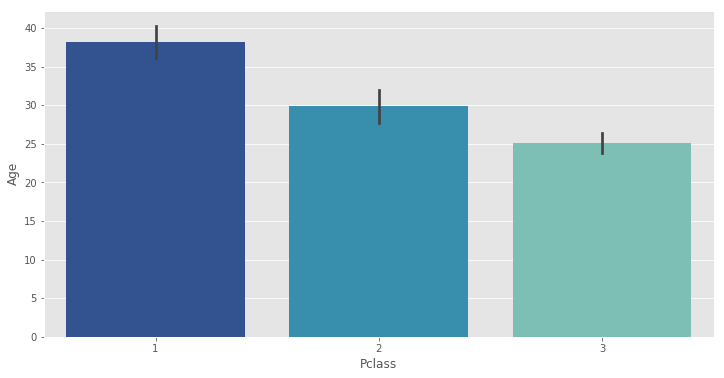

In [13]:
sns.barplot(y='Age', x='Pclass', data=train)

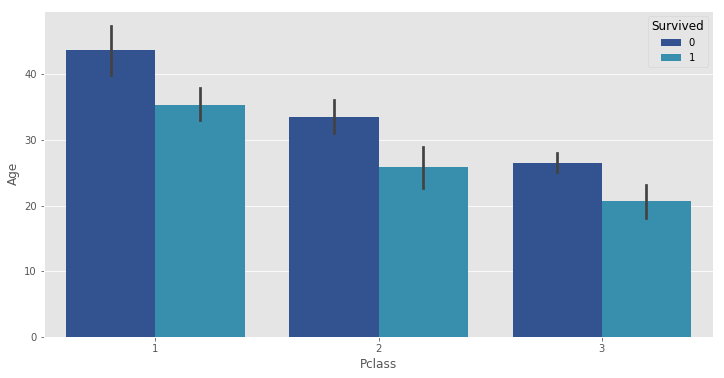

In [14]:
sns.barplot(y='Age', x='Pclass', hue='Survived', data=train)

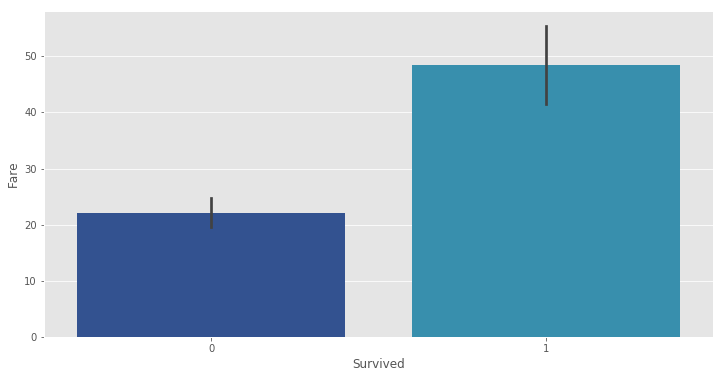

In [15]:
sns.barplot(y='Fare', x='Survived', data=train)

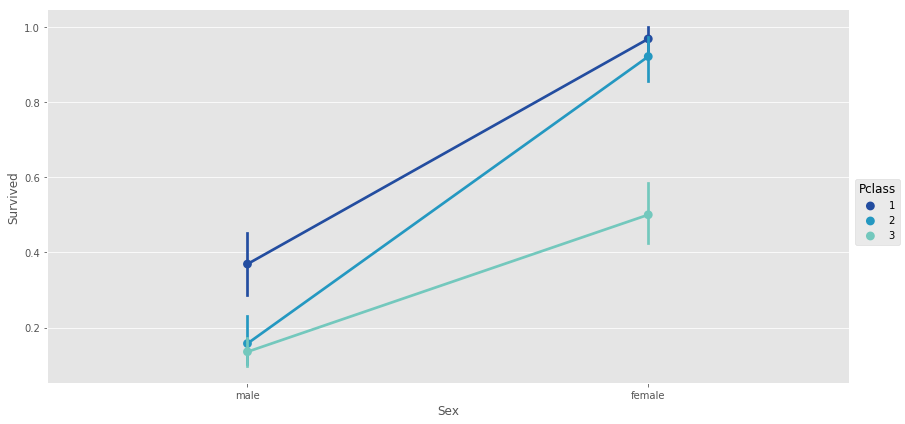

In [16]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=6, aspect=2, data=train)

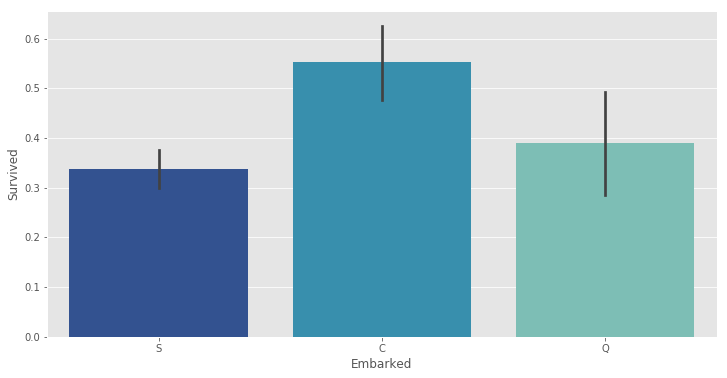

In [79]:
sns.barplot(y='Survived', x='Embarked', data=train)

In [85]:
train['Cabin'].shape

(891,)

In [86]:
train['Cabin'].isnull().sum()

687

In [87]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [116]:
train['Cabin'].isnull().sum()

687

In [120]:
train['Cabin'].value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
E101               3
C22 C26            3
D                  3
F33                3
F2                 3
C124               2
B49                2
E8                 2
F4                 2
E25                2
E33                2
B22                2
B51 B53 B55        2
B35                2
E121               2
C93                2
C68                2
C92                2
B57 B59 B63 B66    2
C2                 2
C125               2
B20                2
D35                2
D26                2
C123               2
C52                2
B28                2
                  ..
B79                1
B78                1
C148               1
D37                1
A6                 1
D9                 1
B82 B84            1
E10                1
B50                1
E68                1
E49                1
C101               1
A20                1
D50                1
C47                1
T                  1
C7           

In [17]:
#Feature engineering

In [18]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name
0,3,male,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris"
1,1,female,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,female,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina"
3,1,female,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,3,male,35.0,0,0,8.0500,S,"Allen, Mr. William Henry"


In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [21]:
def fill_na(df):
    df['Embarked'].fillna(value='Q', inplace=True)
    df['Age'].fillna((x['Age'].median()), inplace=True)
    df['Fare'].fillna((x['Fare'].mean()), inplace=True)

In [22]:
fill_na(x)

In [23]:
x['Embarked'].isnull().sum()

0

In [24]:
x['Embarked'].value_counts(dropna=False)

S    644
C    168
Q     79
Name: Embarked, dtype: int64

In [25]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Name        0
dtype: int64

In [26]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name
0,3,male,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris"
1,1,female,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,female,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina"
3,1,female,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,3,male,35.0,0,0,8.0500,S,"Allen, Mr. William Henry"


In [27]:
#Crafting title names using regex / Let's go over this / Splitting categories etc.

In [28]:
'''def craft_title(x):
    x['Title'] = x.Name.str.extract(' ([A-Za-z]+)\.', expand=False).astype('category')
    value_counts = x.Title.value_counts()
    to_remove = value_counts[value_counts <= 7].index
    return x.Title.replace(to_remove, 'Other')
x['Title'] = craft_title(x)'''

"def craft_title(x):\n    x['Title'] = x.Name.str.extract(' ([A-Za-z]+)\\.', expand=False).astype('category')\n    value_counts = x.Title.value_counts()\n    to_remove = value_counts[value_counts <= 7].index\n    return x.Title.replace(to_remove, 'Other')\nx['Title'] = craft_title(x)"

In [29]:
#Practicing Regex

In [30]:
x['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [31]:
#Creates column or overwrites column
x['First_Name'] = train.Name.str.extract('. (\w*) ', expand=False).astype('category')

In [32]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,First_Name
0,3,male,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris",Owen
1,1,female,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",John
2,3,female,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina",NaN
3,1,female,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Jacques
4,3,male,35.0,0,0,8.0500,S,"Allen, Mr. William Henry",William


In [33]:
x = x.drop('Name', axis=1)

In [34]:
x = pd.get_dummies(x)

In [35]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,First_Name_Viktor,First_Name_Virginia,First_Name_Walter,First_Name_Washington,First_Name_Wendla,First_Name_Wilhelm,First_Name_William,First_Name_der,First_Name_the,First_Name_y
0,3,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 279 entries, Pclass to First_Name_y
dtypes: float64(2), int64(3), uint8(274)
memory usage: 273.3 KB


In [37]:
#Testing different models

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [39]:
random_state = 42

In [40]:
rf = RandomForestClassifier(random_state=random_state)
cv_scores = cross_val_score(rf, x, y, cv=10, scoring='accuracy')
print(cv_scores.mean(), cv_scores.std())

0.8013815117466804 0.046196493747134


In [41]:
lg = LogisticRegression(random_state = random_state)
cv_scores = cross_val_score(lg, x, y, cv=10, scoring='accuracy')
print(cv_scores.mean(), cv_scores.std())

0.7924177164907501 0.021611753588449086


In [42]:
dt = DecisionTreeClassifier(random_state = random_state)
cv_scores = cross_val_score(dt, x, y, cv=10, scoring='accuracy')
print(cv_scores.mean(), cv_scores.std())

0.790245999319033 0.04203989374015027


In [43]:
gn = GaussianNB()
cv_scores = cross_val_score(gn, x, y, cv=10, scoring='accuracy')
print(cv_scores.mean(), cv_scores.std())

0.46329417773237996 0.06403149362441272


In [44]:
kn = KNeighborsClassifier(n_neighbors=50, leaf_size=30)
cv_scores = cross_val_score(rf, x, y, cv=10, scoring='accuracy')
print(cv_scores.mean(), cv_scores.std())

0.8013815117466804 0.046196493747134


In [45]:
pc = Perceptron(random_state = random_state)
cv_scores = cross_val_score(rf, x, y, cv=10, scoring='accuracy')
print(cv_scores.mean(), cv_scores.std())

0.8013815117466804 0.046196493747134


In [46]:
#Grid search to check how adaptable your model is to new data

In [47]:
#Fitting
rf = RandomForestClassifier(random_state=random_state)
rf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

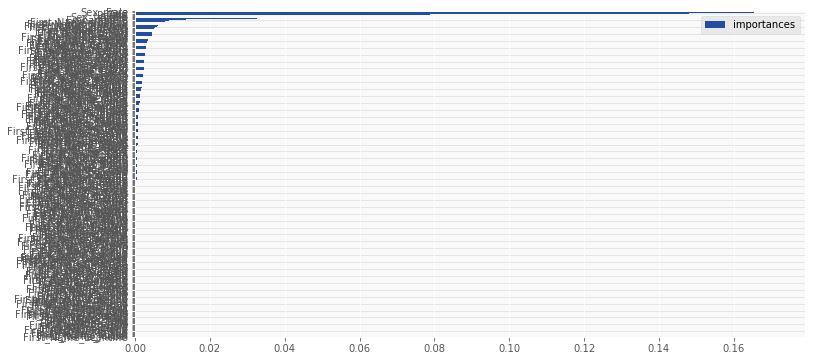

In [48]:
#Feature importance
from sklearn.datasets import load_iris
rf.fit(x, y)

# Save feature importances in a variable
importances = rf.feature_importances_

# Save the list of features
features = x.columns

# Create a new dataframe of the feature importances for plotting
df = pd.DataFrame(index=features, data={'importances': importances})

df = df.sort_values('importances')
df.plot.barh()

In [49]:
#To find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
#Hyperparemeters to test different trees and two different criterions
parameters = ({
    'C': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'penalty':['l1', 'l2']
})
grid_search = GridSearchCV(estimator = lg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [50]:
grid_search.fit(x, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [51]:
grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
best_model = grid_search.best_estimator_

In [53]:
best_model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
#Ensembling

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [56]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier

In [57]:
classifiers = {
    'SVC': SVC(random_state=random_state),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=random_state),
    'AdaBoostClassifier': AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                             learning_rate=0.1, random_state=random_state),
    'RandomForestClassifier': RandomForestClassifier(random_state=random_state),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=random_state),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=random_state),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(random_state=random_state),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis()
}

In [58]:
classifiers.fit

AttributeError: 'dict' object has no attribute 'fit'

In [ ]:
#Predictions

In [ ]:
pred = rf.predict(x) 

In [ ]:
#Submitting to Kaggle with with prediction that I still want to go over 

In [ ]:
submission = pd.read_csv('gender_submission.csv')

In [ ]:
submission['Survived'] = pred

In [ ]:
submission.to_csv('my_submission.csv', index=False)

In [ ]:
ls